In [40]:
#Importar librerias requeridad para la simulacion
import numpy as np
import matplotlib.pyplot as plt

In [41]:
#Importar funciones y objetos requeridos para la simulacion
from functions.Cb_e import C_b_e
from functions.Ce_b import C_e_b
from functions.Mean import mean
from functions.PitotProcess import PitotProcess
from functions.Psi_dot import Psi_dot
from functions.timeintegration import timeintegration
from functions.V_Wind import V_Wind
from functions.ISA import ISA

In [42]:
# Número de muestras
num_muestras = 400

# Valores de velocidad en x, y, z (GPS)
# Simulamos un vuelo con cierta aceleración y cambios de dirección
velocidad_gps = np.zeros((3, num_muestras))
velocidad_gps[0, :] = np.linspace(0, 100, num_muestras)  # Velocidad en x aumentando linealmente
velocidad_gps[1, :] = 20 * np.sin(np.linspace(0, 2 * np.pi, num_muestras))  # Velocidad en y oscilando
velocidad_gps[2, :] = 5 * np.cos(np.linspace(0, np.pi, num_muestras))  # Velocidad en z con cambio suave



In [43]:
# Valores de aceleración (IMU)
# Suponemos que la IMU mide la aceleración real más un pequeño ruido
aceleracion_imu = np.zeros((3, num_muestras))
aceleracion_imu[0, :] = np.gradient(velocidad_gps[0, :]) + np.random.normal(0, 0.1, num_muestras)
aceleracion_imu[1, :] = np.gradient(velocidad_gps[1, :]) + np.random.normal(0, 0.1, num_muestras)
aceleracion_imu[2, :] = np.gradient(velocidad_gps[2, :]) + np.random.normal(0, 0.1, num_muestras)



In [44]:
# Valores de tiempo
tiempo = np.linspace(0, 10, num_muestras)  # 10 segundos de misión



In [45]:
# Valores de ángulos de Euler (psi)
# Simulamos cambios graduales en los ángulos de Euler
psi = np.zeros((3, num_muestras))
psi[0, :] = np.linspace(0, np.pi / 6, num_muestras)  # Roll aumentando ligeramente
psi[1, :] = np.linspace(0, -np.pi / 4, num_muestras)  # Pitch disminuyendo ligeramente
psi[2, :] = np.linspace(0, np.pi / 2, num_muestras)  # Yaw aumentando



In [46]:
# Valores de temperatura y presión
# Simulamos una disminución gradual de temperatura y presión con la altitud
temperatura = np.linspace(20, -10, num_muestras)  # Temperatura disminuyendo
presion = ISA(0, temperatura[0])[1] * (1 - 0.0065 * np.linspace(0, 5000, num_muestras) / 288.15) ** 5.255  # Presión disminuyendo



In [47]:
# Valores de presión dinámica (Pitot)
# Calculamos la presión dinámica a partir de la velocidad GPS y la densidad del aire (ISA)
densidad = np.array([ISA(0, t)[0] for t in temperatura])
presion_dinamica = 0.5 * densidad * np.linalg.norm(velocidad_gps, axis=0) ** 2

# Imprimir algunos valores de ejemplo
print("Velocidad (GPS):")
print(velocidad_gps[:, :5])  # Imprimir las primeras 5 muestras

print("\nAceleración (IMU):")
print(aceleracion_imu[:, :5])

print("\nTiempo:")
print(tiempo[:5])

print("\nÁngulos de Euler (psi):")
print(psi[:, :5])

print("\nTemperatura y Presión:")
for i in range(5):
    print(f"Muestra {i}: Temperatura = {temperatura[i]:.2f} °C, Presión = {presion[i]:.2f} Pa")

print("\nPresión dinámica (Pitot):")
print(presion_dinamica[:5])

Velocidad (GPS):
[[0.         0.25062657 0.50125313 0.7518797  1.00250627]
 [0.         0.31493362 0.62978914 0.94448849 1.25895363]
 [5.         4.99984501 4.99938007 4.99860519 4.99752042]]

Aceleración (IMU):
[[ 0.1525074   0.5117255   0.16306707  0.28249953  0.32346181]
 [ 0.17025973  0.14186291  0.25795158  0.22512054  0.33046894]
 [-0.06414331 -0.03125573 -0.07632571  0.02714274  0.04472803]]

Tiempo:
[0.         0.02506266 0.05012531 0.07518797 0.10025063]

Ángulos de Euler (psi):
[[ 0.          0.00131228  0.00262456  0.00393683  0.00524911]
 [ 0.         -0.00196842 -0.00393683 -0.00590525 -0.00787367]
 [ 0.          0.00393683  0.00787367  0.0118105   0.01574733]]

Temperatura y Presión:
Muestra 0: Temperatura = 20.00 °C, Presión = 101325.00 Pa
Muestra 1: Temperatura = 19.92 °C, Presión = 101174.58 Pa
Muestra 2: Temperatura = 19.85 °C, Presión = 101024.33 Pa
Muestra 3: Temperatura = 19.77 °C, Presión = 100874.27 Pa
Muestra 4: Temperatura = 19.70 °C, Presión = 100724.38 Pa

Pr

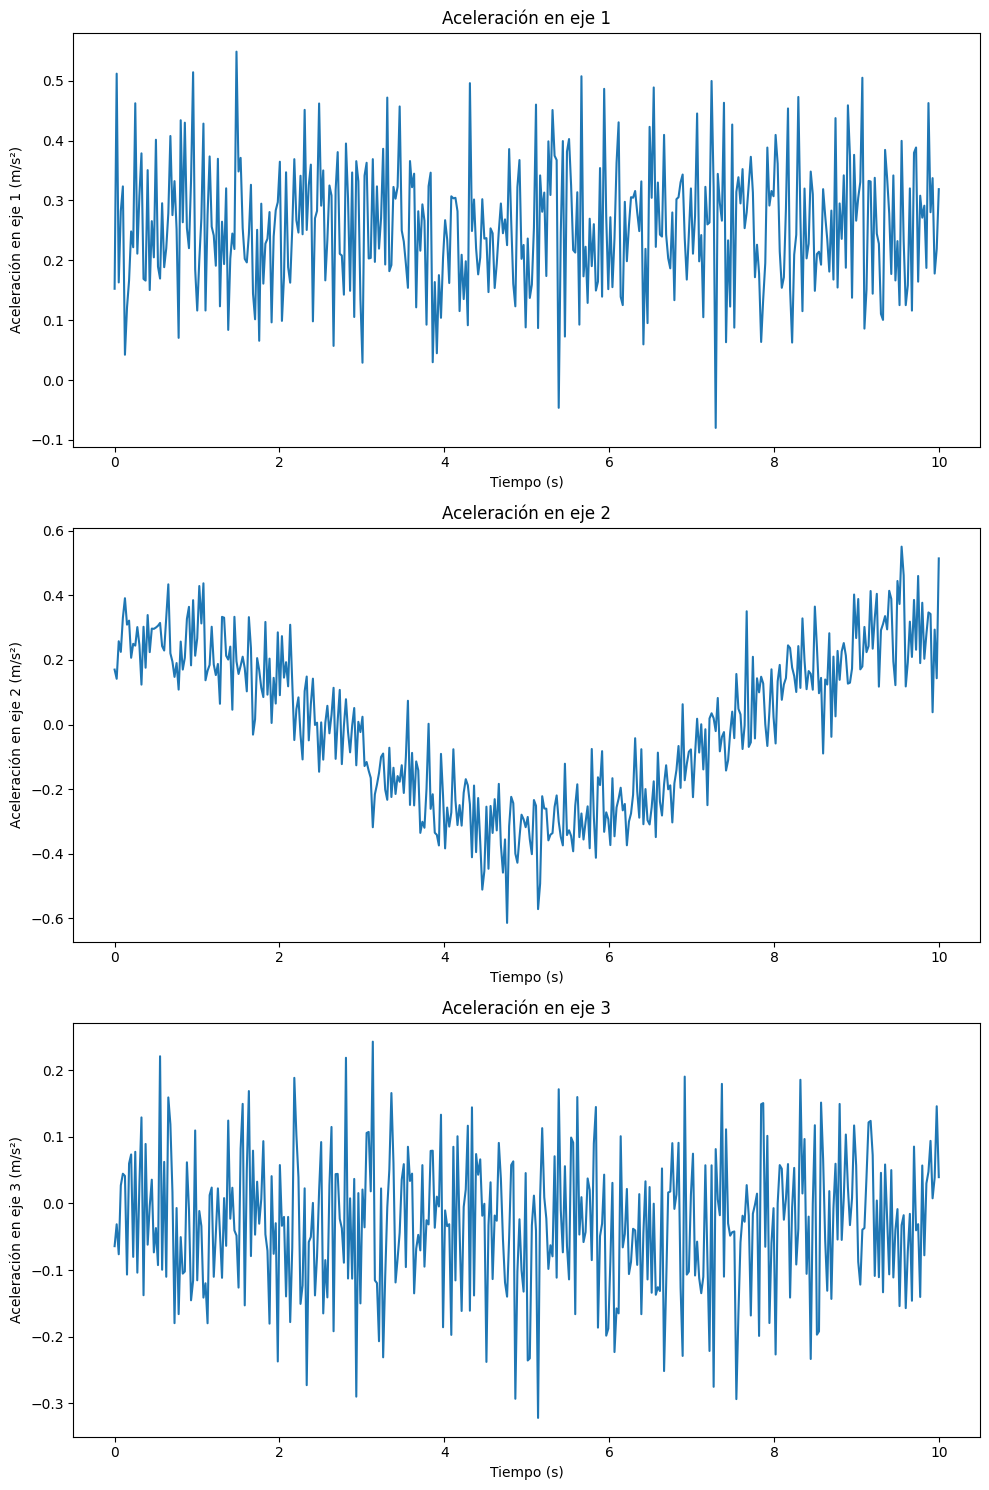

In [48]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
for i in range(3):
    axs[i].plot(tiempo, aceleracion_imu[i, :])
    axs[i].set_title(f'Aceleración en eje {i+1}')
    axs[i].set_xlabel('Tiempo (s)')
    axs[i].set_ylabel(f'Aceleración en eje {i+1} (m/s²)')

plt.tight_layout()
plt.show()